# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [202]:
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Markdown

1. Finn likevektspris og -kvantum for alle verdier av $t$.        


In [203]:
def demand(p):
    return (500-p)/3.2

def supply(p, t):
    return ((100+p)/4.3) + t




In [204]:
p, t = sp.symbols('p t', real = True, positive = True)

eq_1 = sp.Eq(demand(p), supply(p, t))
eq_1

Eq(156.25 - 0.3125*p, 0.232558139534884*p + t + 23.2558139534884)

In [205]:
pris_eq = sp.solve(eq_1, p)[0]
kvantum_eq = demand(pris_eq)
print(f'Likevektsprisen for pris er {pris_eq} og likevektskvantum er {kvantum_eq}')

Likevektsprisen for pris er 244.0 - 1.83466666666667*t og likevektskvantum er 0.573333333333333*t + 80.0


2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           


In [206]:
# Bruk sp.lambdify for å gjøre om sympy til numpy array

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,p), 
    pris_eq
)

#p_eq_fn(t,p)
p_eq_fn(0,0)
p_eq_fn_uten_avgift = p_eq_fn(0,0)
p_eq_fn_med_avgift = p_eq_fn(4,0)



x_eq_fn=sp.lambdify(
    (t,p), 
    kvantum_eq
)

x_eq_fn(t,p)
x_eq_fn_uten_avgift = x_eq_fn(0,0)
x_eq_fn_med_avgift = x_eq_fn(4,0)

x_eq_fn_med_avgift

print(p_eq_fn_uten_avgift)
print(x_eq_fn_uten_avgift)
print(p_eq_fn_med_avgift)
print(x_eq_fn_med_avgift)


avgift = x_eq_fn_med_avgift-x_eq_fn_uten_avgift
print(avgift)
prod = 4-avgift


244.0
80.0
236.66133333333332
82.29333333333334
2.2933333333333366


2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     


80.0 244.0


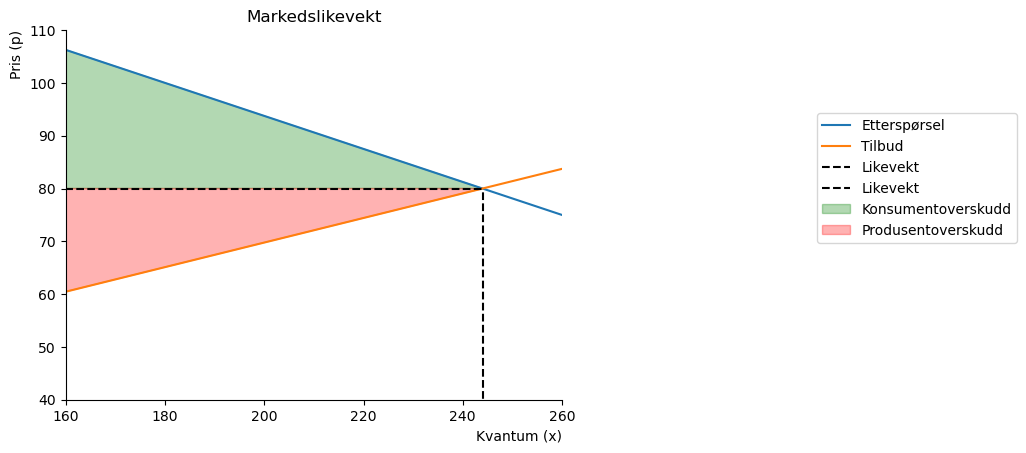

In [213]:
x_num=np.linspace(0.1,100,100)
q = np.linspace(0,p_eq_fn_uten_avgift,100)
x_num=np.linspace(0.1,500,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(160,260))
                ax.set(ylim=(40,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax



fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
#ax.plot(x_num, supply(x_num, 4), label='Tilbud med avgift')
ax.plot(x_num, supply(x_num, 0), label='Tilbud')




ax.hlines(x_eq_fn_uten_avgift,0,p_eq_fn_uten_avgift, color='black',ls='dashed', label="Likevekt")
ax.vlines(p_eq_fn_uten_avgift,0,x_eq_fn_uten_avgift, color='black',ls='dashed', label="Likevekt")


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));






ax.fill_between(q, x_eq_fn_uten_avgift, demand(q), q, color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q, supply(q, 0), x_eq_fn_uten_avgift, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6))
print(x_eq_fn_uten_avgift, p_eq_fn_uten_avgift)



2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      


Text(232.66, 37.5, '237')

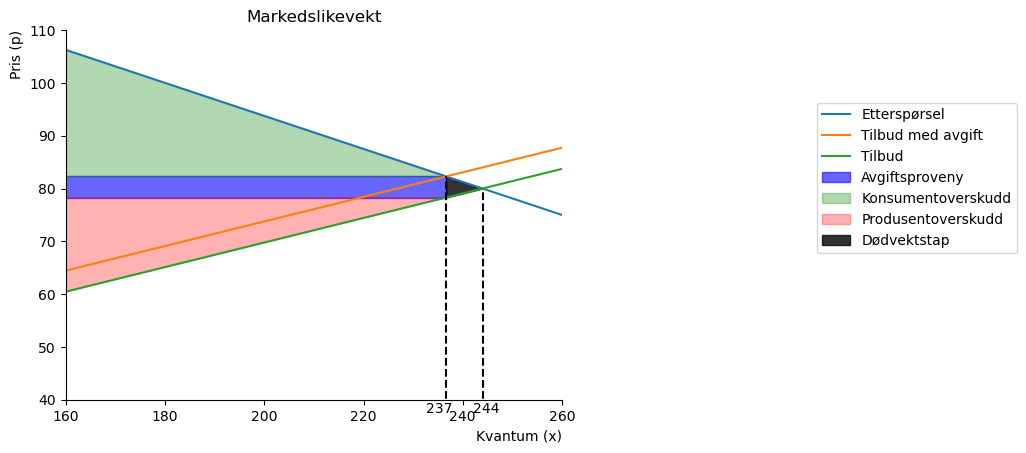

In [208]:
x_num=np.linspace(0.1,100,100)
q = np.linspace(0,p_eq_fn_uten_avgift,100)
x_num=np.linspace(0.1,500,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(160,260))
                ax.set(ylim=(40,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')

                
                return fig, ax



fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num, 4), label='Tilbud med avgift')
ax.plot(x_num, supply(x_num, 0), label='Tilbud')










# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));



ax.legend(bbox_to_anchor=(1.5,0.6))


q2 = np.linspace(0,p_eq_fn_med_avgift,100)

ax.fill_between(q2, demand(p_eq_fn_med_avgift), x_eq_fn_med_avgift-4, color = "blue",alpha = 0.6,label='Avgiftsproveny')
ax.fill_between(q2, x_eq_fn_uten_avgift+avgift, demand(q2), q, color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q2, supply(q2, 0), x_eq_fn_uten_avgift-prod, color = "red",alpha = 0.3,label='Produsentoverskudd')

q3 = np.linspace(p_eq_fn_med_avgift,p_eq_fn_uten_avgift, 100)

ax.fill_between(q3,supply(q3, 0),demand(q3), color = "black",alpha = 0.8,label='Dødvektstap') 

ax.legend(bbox_to_anchor=(1.5,0.6))


ax.vlines(p_eq_fn_med_avgift,0,x_eq_fn_med_avgift, color='black',ls='dashed')

ax.vlines(p_eq_fn_uten_avgift,0,x_eq_fn_uten_avgift, color='black',ls='dashed')

ax.annotate(round(p_eq_fn_uten_avgift), xy=(round(p_eq_fn_uten_avgift, 2)-2, 37.5), annotation_clip=False)
ax.annotate(round(p_eq_fn_med_avgift), xy=(round(p_eq_fn_med_avgift, 2)-4, 37.5), annotation_clip=False)

4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [209]:
producer_surplus_uten_avgift=sp.integrate(x_eq_fn_uten_avgift-supply(p, 0),(p,0,p_eq_fn_uten_avgift))
print(producer_surplus_uten_avgift)
producer_surplus_med_avgift=sp.integrate(x_eq_fn_med_avgift-supply(p, 4),(p,0,p_eq_fn_med_avgift))
print(producer_surplus_med_avgift)


6922.79069767442
6512.62635989664


In [210]:
consumer_surplus_uten_avgift=sp.integrate(demand(p)-x_eq_fn_uten_avgift,(p,0,p_eq_fn_uten_avgift))
print(consumer_surplus_uten_avgift)
consumer_surplus_med_avgift=sp.integrate(demand(p)-x_eq_fn_med_avgift,(p,0,p_eq_fn_med_avgift))
print(consumer_surplus_med_avgift)


9302.50000000000
8751.34167111111


In [211]:
avgiftsproveny = sp.integrate(4, (p, 0, x_eq_fn_med_avgift)) 
dødvektstap = sp.integrate(demand(p) - supply(p, 0), (p, p_eq_fn_med_avgift, p_eq_fn_uten_avgift)) 
print(avgiftsproveny)
print(dødvektstap)

329.173333333333
14.6773333333313


In [212]:
tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | ${x_eq_fn_uten_avgift }$    | ${round(x_eq_fn_med_avgift, 2)}$| ${round(x_eq_fn_med_avgift - x_eq_fn_uten_avgift, 2)}$  |
| Produsentpris:  | ${x_eq_fn_uten_avgift }$ | ${round(x_eq_fn_med_avgift, 2)-4 }$  | ${round((x_eq_fn_med_avgift - x_eq_fn_uten_avgift)-4, 2)}$ |
| Kvantum:  | ${round(p_eq_fn_uten_avgift, 2)}$  | ${round(p_eq_fn_med_avgift, 2)}$   |  ${round(p_eq_fn_med_avgift - p_eq_fn_uten_avgift, 2)}$  |
| Konsumentoverskudd: | ${round(consumer_surplus_uten_avgift, 2)}$ |${round(consumer_surplus_med_avgift, 2)}$ |  ${round(consumer_surplus_med_avgift - consumer_surplus_uten_avgift, 2)}$   |
| Produsentoverskudd: | ${round(producer_surplus_uten_avgift, 2)}$ | ${round(producer_surplus_med_avgift, 2)}$ |  ${round(producer_surplus_med_avgift - producer_surplus_uten_avgift, 2)}$ |
| KO + PO:    |  ${round(producer_surplus_uten_avgift + consumer_surplus_uten_avgift, 2)}$   | ${round(producer_surplus_med_avgift + consumer_surplus_med_avgift, 2)}$| ${round((producer_surplus_med_avgift + consumer_surplus_med_avgift) - (producer_surplus_uten_avgift + consumer_surplus_uten_avgift), 2)}$ |
|Avgiftsproveny :| ${0}$  |${round(avgiftsproveny, 2)}$ | ${round(avgiftsproveny, 2) - 0}$|
| Dødvektstap:  |${0}$   | ${round(dødvektstap, 2)}$ | ${round(dødvektstap, 2) - 0}$|
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:   | $80.0$    | $82.29$| $2.29$  |
| Produsentpris:  | $80.0$ | $78.29$  | $-1.71$ |
| Kvantum:  | $244.0$  | $236.66$   |  $-7.34$  |
| Konsumentoverskudd: | $9302.50$ |$8751.34$ |  $-551.16$   |
| Produsentoverskudd: | $6922.79$ | $6512.63$ |  $-410.16$ |
| KO + PO:    |  $16225.29$   | $15263.97$| $-961.32$ |
|Avgiftsproveny :| $0$  |$329.17$ | $329.17$|
| Dødvektstap:  |$0$   | $14.68$ | $14.68$|
